In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [38]:
df=pd.read_csv('/Users/dongchen/Documents/MMAI/MBAN_6110/Assignment_1/sales_data.csv')
df.describe()

,Price,Units Sold
count,945.000000,943.000000
mean,108.628011,10.200424
std,167.350086,3.247589
min,0.190000,2.000000
25%,26.420000,8.000000
50%,64.640000,10.000000
75%,142.310000,12.000000
max,2636.900000,22.000000


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      942 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  943 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


Step.1:  I chose to do is to drop all the NaN data in the 'Product' and 'Region' column, cause it the type of data that I could not predict by analyze this dataset .

In [97]:
df1 = df.dropna(subset=['Product','Region'])
type(df1)

pandas.core.frame.DataFrame

Step.2 Try to find the best way to fill the NaN data at the price colunm

In [78]:
#First I try to use mean and median of the price to fill the NaN data in the price colunm but mean and median of the price data has a huge difference even  I get ride of the outlier
df1.groupby('Product')['Price'].agg(['mean','median'])

,mean,median
Product,,
Product_1,98.842941,72.550
Product_10,103.243125,94.755
Product_11,125.675455,85.430
Product_12,81.461538,82.690
Product_13,88.629412,54.910
Product_14,105.698889,55.650
Product_15,89.121053,39.720
Product_16,78.740833,46.760
Product_17,119.851765,120.080


In [107]:
#Group the data by Product and Region to see if the price changes related to region
df1.groupby(['Product','Region'])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Library/Frameworks/Python.framework/Versions/3.10/lib/pytho

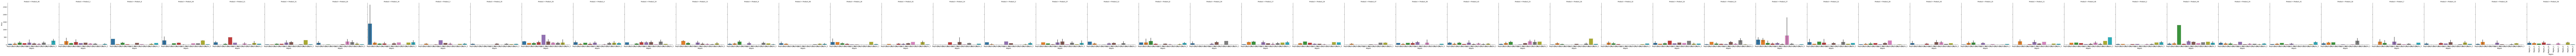

In [110]:
#Create data chart for each region and price for each product, comparing them. The charts demmonstrate the price of product is co-related to product itself and region
sns.catplot(x='Region',y='Price',data=df1,kind='bar',col='Product')
plt.xticks(rotation =90)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


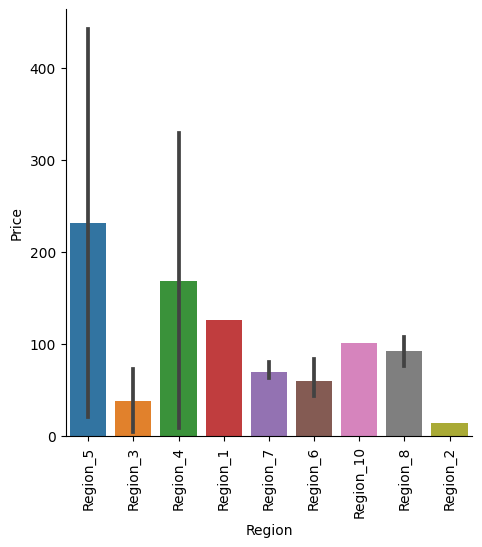

In [119]:
# The price difference of Product_1 in various region
pdf1=df[df['Product']=='Product_1']
sns.catplot(x='Region',y='Price',data=pdf1,kind='bar')
plt.xticks(rotation =90)
plt.show()

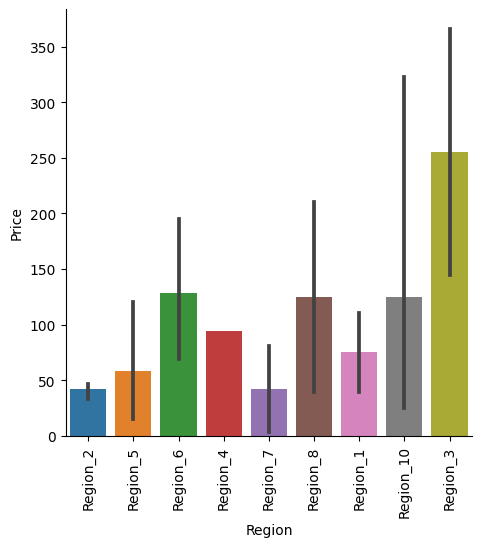

In [120]:
# The price difference of Product_40 in various region
pdf40=df[df['Product']=='Product_40']
sns.catplot(x='Region',y='Price',data=pdf40,kind='bar')
plt.xticks(rotation =90)
plt.show()

In [122]:
#Because the price and product is different in region, it is more accurate if we use the mean/median price of the group data 
df1.groupby(['Product','Region'])['Price'].agg(['mean','median'])

mean   median
Product   Region                        
Product_1 Region_1   125.890000  125.890
          Region_10  100.230000  100.230
          Region_2    13.380000   13.380
          Region_3    37.975000   37.975
          Region_4   168.340000  168.340
...                         ...      ...
Product_9 Region_5    75.323333  100.320
          Region_6   110.810000  110.810
          Region_7          NaN      NaN
          Region_8   191.723333  282.730
          Region_9    76.010000   76.010

[403 rows x 2 columns]